In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from preprocessing import Preprocsssing as PP

In [91]:
from classes import transportnetwork  as TN
# Read in the graph data
with open("../../../data/road-euroroad.edges", "r") as f:
    lines = f.readlines()

In [92]:
G.number_of_nodes()

1174

In [93]:
G.number_of_edges()

1417

In [101]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 43.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [111]:
def analyse_centrality(TN):
    # Calculate the centralities for each node
    degree_centralities = nx.degree_centrality(TN)
    betweenness_centralities = nx.betweenness_centrality(TN)
    closeness_centralities = nx.closeness_centrality(TN)

    # Sort the nodes based on their centrality values in descending order
    degree_ranks = sorted(degree_centralities.items(), key=lambda x: x[1], reverse=True)
    betweenness_ranks = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)
    closeness_ranks = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)

    # Create a list to store the node ranks and centralities
    node_centralities = []

    # Iterate through the nodes and calculate their ranks and centralities
    for rank, (node, _) in enumerate(degree_ranks):
        degree_centrality = degree_centralities[node]
        betweenness_centrality = betweenness_centralities[node]
        closeness_centrality = closeness_centralities[node]

        # Calculate the ranks of the node's centralities in the sorted lists
        degree_rank = degree_ranks.index((node, degree_centrality)) + 1
        betweenness_rank = betweenness_ranks.index((node, betweenness_centrality)) + 1
        closeness_rank = closeness_ranks.index((node, closeness_centrality)) + 1

        # Add the node's ranks and centralities to the list
        node_centralities.append((node, degree_rank, degree_centrality, betweenness_rank, betweenness_centrality, closeness_rank, closeness_centrality))

        # Print out the centrality information for the node
        print(f"Node {node}:")
        print(f"\tDegree Centrality Rank: {degree_rank}/{len(degree_ranks)}, Value: {degree_centrality:.4f}")
        print(f"\tBetweenness Centrality Rank: {betweenness_rank}/{len(betweenness_ranks)}, Value: {betweenness_centrality:.4f}")
        print(f"\tCloseness Centrality Rank: {closeness_rank}/{len(closeness_ranks)}, Value: {closeness_centrality:.4f}")

    # Return the list of node ranks and centralities
    return node_centralities

In [112]:
node_centralities = analyse_centrality(G)

Node 284:
	Degree Centrality Rank: 1/1174, Value: 0.0085
	Betweenness Centrality Rank: 2/1174, Value: 0.2125
	Closeness Centrality Rank: 10/1174, Value: 0.0730
Node 7:
	Degree Centrality Rank: 2/1174, Value: 0.0068
	Betweenness Centrality Rank: 13/1174, Value: 0.1443
	Closeness Centrality Rank: 31/1174, Value: 0.0695
Node 39:
	Degree Centrality Rank: 3/1174, Value: 0.0068
	Betweenness Centrality Rank: 301/1174, Value: 0.0092
	Closeness Centrality Rank: 324/1174, Value: 0.0583
Node 137:
	Degree Centrality Rank: 4/1174, Value: 0.0068
	Betweenness Centrality Rank: 50/1174, Value: 0.0620
	Closeness Centrality Rank: 67/1174, Value: 0.0669
Node 107:
	Degree Centrality Rank: 5/1174, Value: 0.0068
	Betweenness Centrality Rank: 86/1174, Value: 0.0433
	Closeness Centrality Rank: 262/1174, Value: 0.0600
Node 236:
	Degree Centrality Rank: 6/1174, Value: 0.0068
	Betweenness Centrality Rank: 96/1174, Value: 0.0406
	Closeness Centrality Rank: 111/1174, Value: 0.0644
Node 43:
	Degree Centrality Rank: 

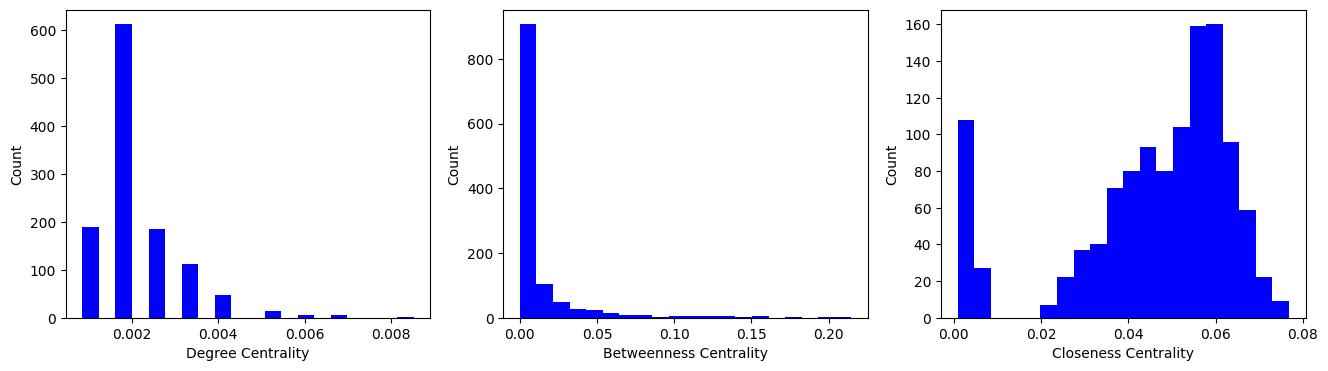

In [114]:
def plot_centralities_histogram(G, centralities, titles):
    # Set up the plot
    fig, axs = plt.subplots(1, len(centralities), figsize=(16, 4))

    # Plot the centrality for each node in the graph
    for j, centrality in enumerate(centralities):
        centrality_scores = centrality(G)
        sorted_scores = sorted(centrality_scores.values(), reverse=True)
        axs[j].hist(sorted_scores, bins=20, color='blue')
        axs[j].set_xlabel(titles[j])
        axs[j].set_ylabel("Count")

    # Show the plot
    plt.show()
    # Plot the centralities if the user wants to
if user_input == "yes":
    titles = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']

    # Plot the centralities
    plot_centralities_histogram(G, centralities, titles)


In [117]:
import plotly.express as px
import plotly.graph_objects as go

def plot_centralities_histogram(G, centralities, titles):
    # Set up the plot
    fig = go.Figure()

    # Plot the centrality for each node in the graph
    for j, centrality in enumerate(centralities):
        centrality_scores = centrality(G)
        sorted_scores = sorted(centrality_scores.values(), reverse=True)
        fig.add_trace(go.Histogram(x=sorted_scores, nbinsx=20, marker_color='blue', name=titles[j]))

    # Set layout and show the plot
    fig.update_layout(title='Centralities Histogram', xaxis_title='Centrality Score', yaxis_title='Count')
    fig.show()

# Plot the centralities if the user wants to
if user_input == "yes":
    titles = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']
    centralities = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality]

    # Plot the centralities
    plot_centralities_histogram(G, centralities, titles)

In [121]:
import plotly.express as px
import plotly.graph_objects as go

def plot_centralities_histogram(G, centralities, titles):
    # Set up the plot
    fig = go.Figure()

    colors = ['red', 'green', 'blue']

    # Plot the centrality for each node in the graph
    for j, centrality in enumerate(centralities):
        centrality_scores = centrality(G)
        sorted_scores = sorted(centrality_scores.values(), reverse=True)
        #fig.add_trace(go.Histogram(x=sorted_scores, nbinsx=20, marker_color='blue', name=titles[j]))
        fig.add_trace(go.Histogram(x=sorted_scores, nbinsx=20, marker_color=colors[j], name=titles[j]))

    # Set layout and show the plot
    fig.update_layout(title='Centralities Histogram', xaxis_title='Centrality Score', yaxis_title='Count')
    fig.show()

# Plot the centralities if the user wants to
if user_input == "yes":
    titles = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']
    centralities = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality]

    # Plot the centralities
    plot_centralities_histogram(G, centralities, titles)